<a href="https://colab.research.google.com/github/1shikapandey/Iris-Flower-Classification-using-Decision-Trees/blob/main/Iris_Flower_Classification_using_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Step 1: Load dataset

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Petal length & petal width for 2D visualization
y = iris.target

## Step 2: Train/Test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3: Train Decision Tree

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Step 4: Visualize Decision Tree

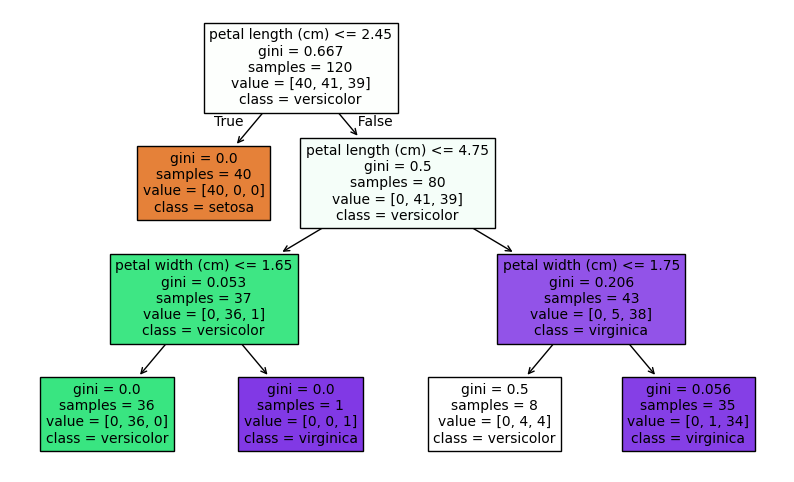

In [ ]:
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=iris.feature_names[2:4],
          class_names=iris.target_names, filled=True)
plt.show()

## Step 5: Plot Decision Boundaries


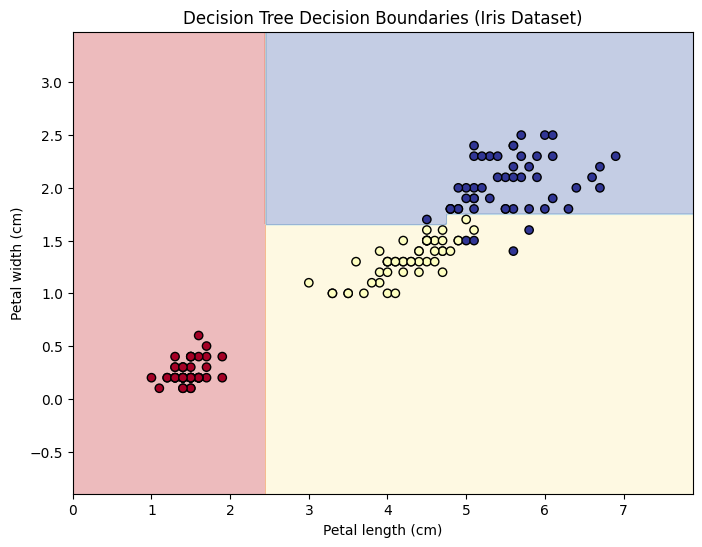

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Decision Tree Decision Boundaries (Iris Dataset)")
plt.show()

## Step 6: Evaluate Model on Test Data


In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy (Test Set):", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy (Test Set): 1.0

 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Confusion Matrix


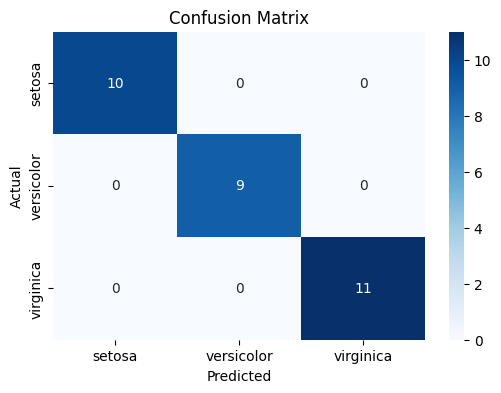

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Step 7: Cross-Validation (5-fold)


In [ ]:
scores = cross_val_score(clf, X, y, cv=5)
print("\n Cross-Validation Scores (5-fold):", scores)
print("Mean CV Accuracy:", scores.mean())


 Cross-Validation Scores (5-fold): [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean CV Accuracy: 0.96
